In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")
pd.set_option('display.max_columns',50)

In [3]:
print("size of train dataset",df_train.shape)
print("size of test dataset",df_test.shape)

size of train dataset (8523, 12)
size of test dataset (5681, 11)


In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
null_percentage_of_train_data=df_train.isnull().sum()/df_train.shape[0]*100
null_percentage_of_train_data

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [11]:
null_percentage_of_test_data=df_test.isnull().sum()/df_test.shape[0]*100
null_percentage_of_test_data

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

### Backup dataset :

In [12]:
Backup_dataset_train=df_train.copy()
Backup_dataset_test = df_test.copy()

### Data Cleaning & Null Treatment

In [13]:
df_train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [14]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
from sklearn.impute import SimpleImputer  #using simple imputer to fill the null value

In [16]:
simple_imp = SimpleImputer(missing_values=np.nan,strategy='mean')

In [17]:
df_train.iloc[:,1:2]=simple_imp.fit_transform(df_train.iloc[:,1:2])

In [18]:
df_train['Item_Weight'].isnull().sum()

0

In [19]:
df_test.iloc[:,1:2]=simple_imp.fit_transform(df_test.iloc[:,1:2])

In [20]:
df_test['Item_Weight'].isnull().sum()

0

In [21]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [22]:
df_test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [23]:
df_test = df_test.drop(columns=['Outlet_Size',],axis=1)

In [24]:
df_train = df_train.drop(columns=['Outlet_Size'],axis=1)

In the Outlet_Size our missing data percentage is more then 20% hence had better to keep we can drop it.and will not much contribute in our predictions.


In [25]:
print("shape of train data",df_train.shape)
print("shape of test data",df_test.shape)

shape of train data (8523, 11)
shape of test data (5681, 10)


In [26]:
print("null values in train data",df_train.isnull().sum().sum())
print("null values in train data",df_test.isnull().sum().sum())

null values in train data 0
null values in train data 0


### Exploratory Data Analysis (EDA)

In [27]:
sns.set(style='darkgrid') # using sns grid function to set grid

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

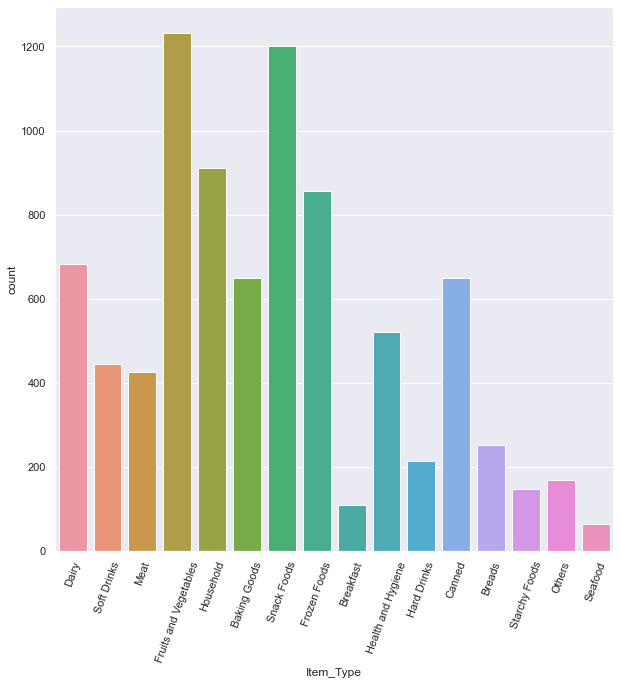

In [28]:
#checking the observations of Item_Type
plt.figure(figsize=(10,10))
sns.countplot(x='Item_Type',data=df_train)
plt.xticks(rotation=70)

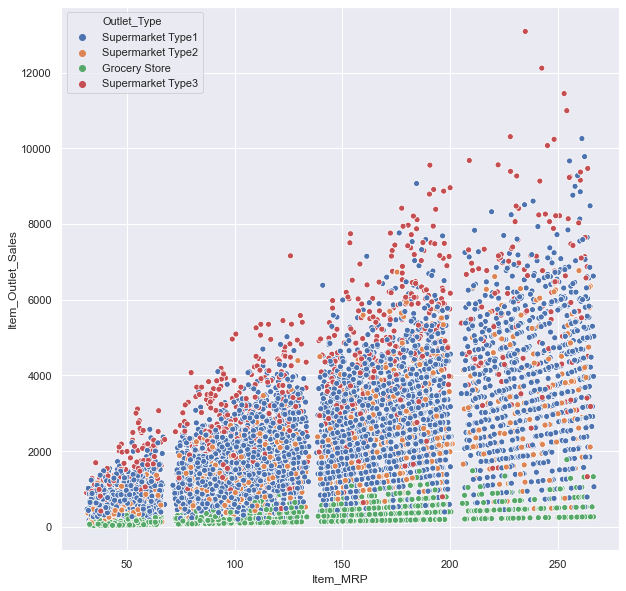

In [29]:
#checking the relation between Item_MRP and Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df_train,hue='Outlet_Type')

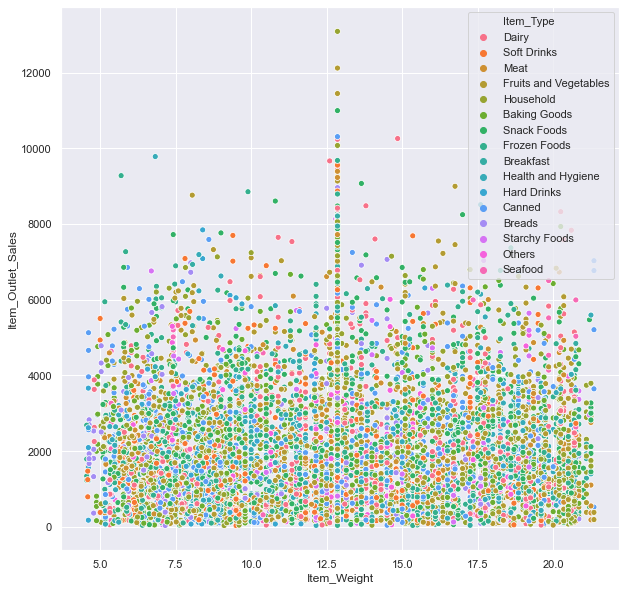

In [30]:
#checking the relation between Item_Weight and Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df_train,hue='Item_Type')

<Figure size 720x720 with 0 Axes>

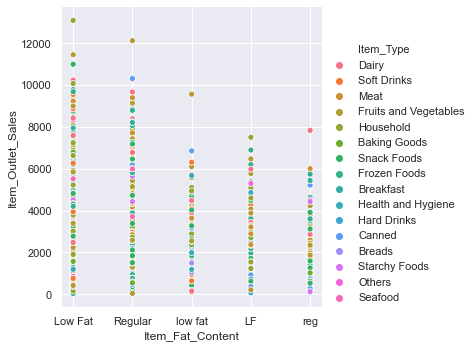

In [31]:
#checking the relation between Item_Fat_Content and Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.relplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train,hue='Item_Type')

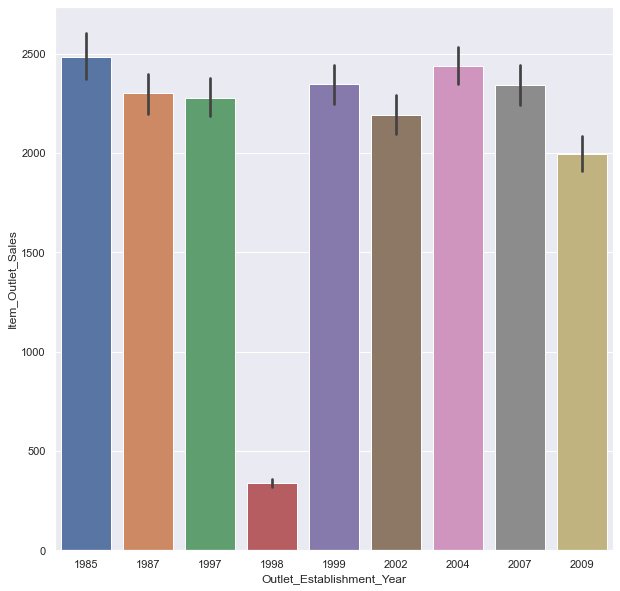

In [32]:
#checking the relation between Outlet_Establishment_Year and Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df_train)

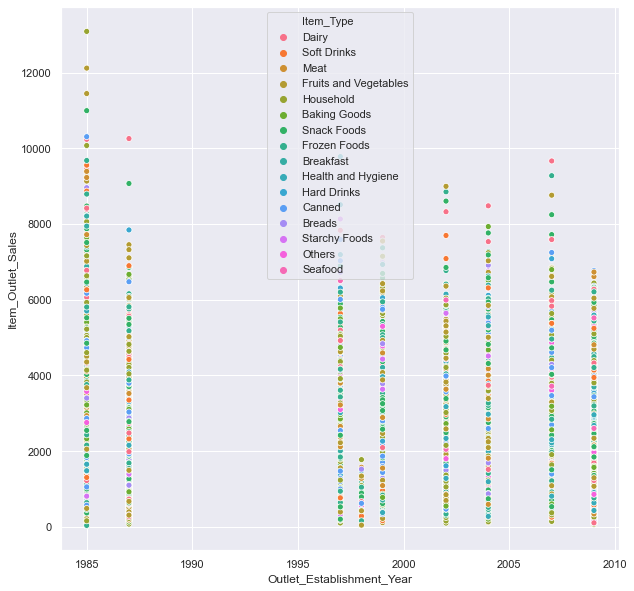

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df_train,hue='Item_Type')

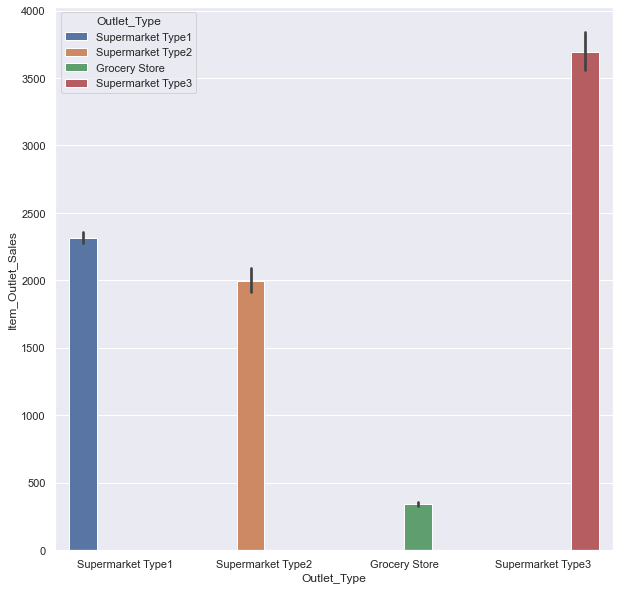

In [34]:
#checking the relation between Outlet_Type and Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df_train,hue='Outlet_Type')

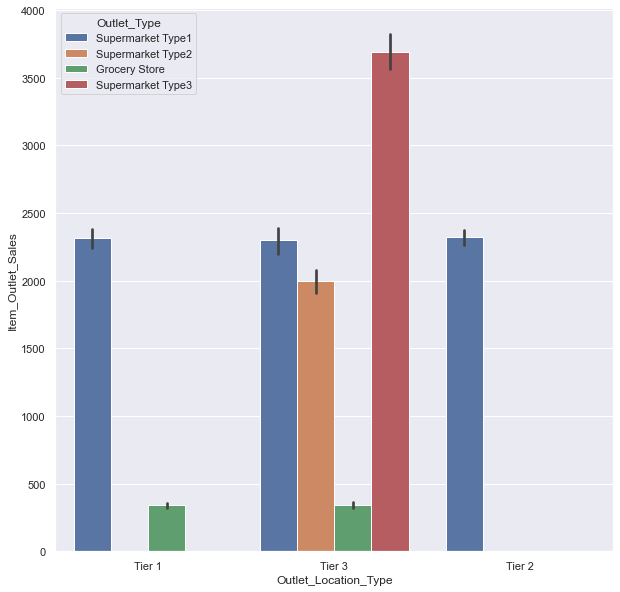

In [35]:
#checking the relation between Outlet_Location_Type and Item_Outlet_Sales
plt.figure(figsize=(10,10))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train,hue='Outlet_Type')

### Corelation Matrix

In [36]:
corr = df_train.corr()

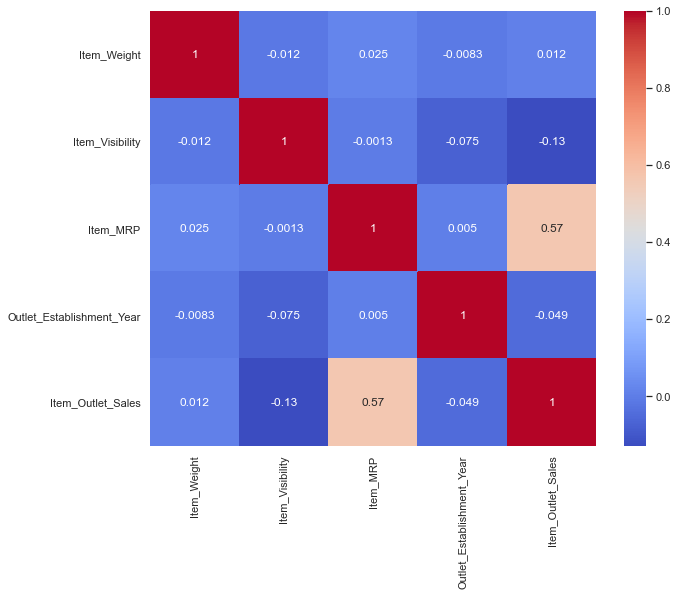

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [38]:
#replacing the 0 values if any in below columns
df_train['Item_Weight'] = df_train['Item_Weight'].replace(0,df_train['Item_Weight'].mean())
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0,df_train['Item_Visibility'].mean())
df_train['Item_MRP'] = df_train['Item_MRP'].replace(0,df_train['Item_MRP'].mean())

In [39]:
#getting numerical columns for train data
df_train_numeric = df_train.select_dtypes(include=['int','float'])
df_train_numeric.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [40]:
#getting numerical columns for test data
df_test_numeric = df_test.select_dtypes(include=['int','float'])
df_test_numeric.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

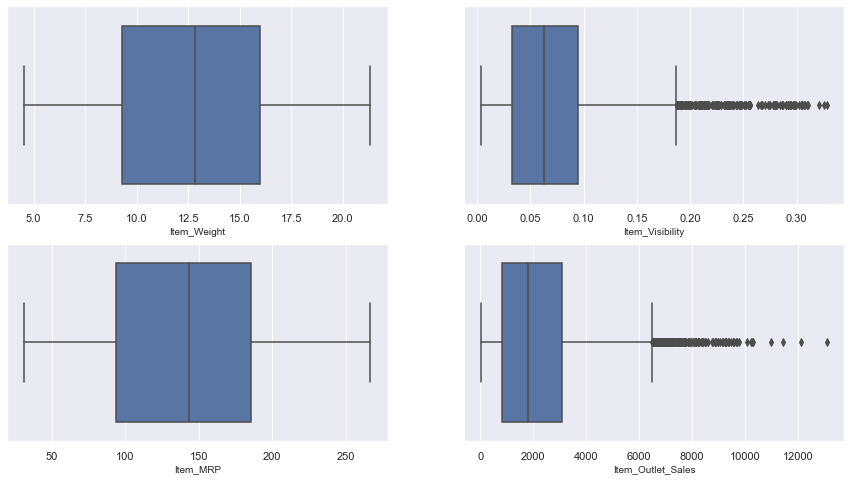

In [41]:
#checking outliars in test data
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_train_numeric:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.boxplot(df_train_numeric[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

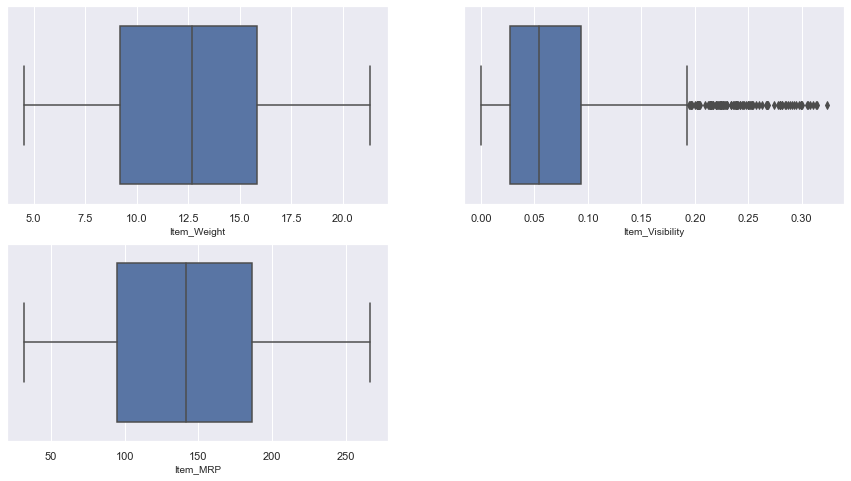

In [42]:
#checking outliars in train data
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_test_numeric:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.boxplot(df_test_numeric[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

### Outliar Detection & Removel

* Using power transformation for outliar removel

In [43]:
from sklearn.preprocessing import PowerTransformer

In [44]:
power = PowerTransformer(method='yeo-johnson')

In [45]:
df_test['Item_Visibility'] = power.fit_transform(df_test['Item_Visibility'].values.reshape(-1,1))

In [46]:
df_train['Item_Visibility'] = power.fit_transform(df_train['Item_Visibility'].values.reshape(-1,1))

In [47]:
df_train_numeric1 = df_train.select_dtypes(include=['int','float'])
df_train_numeric1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [48]:
df_test_numeric2 = df_test.select_dtypes(include=['int','float'])
df_test_numeric2.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

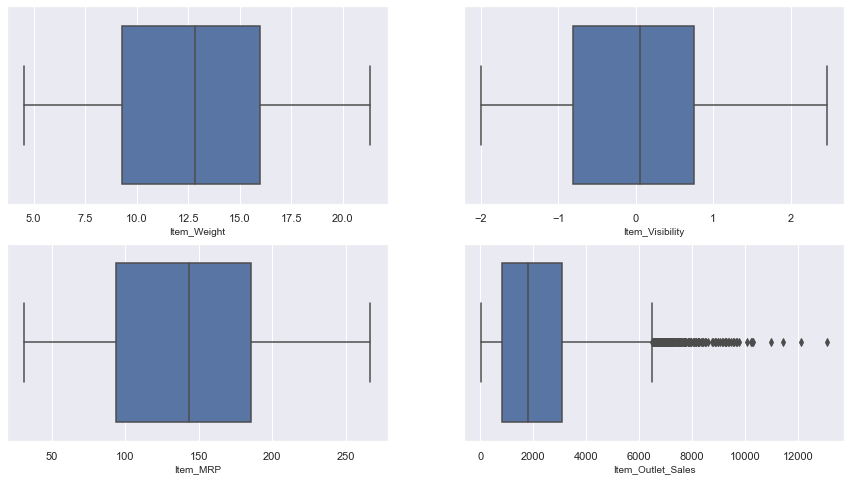

In [49]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_train_numeric1:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.boxplot(df_train_numeric1[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

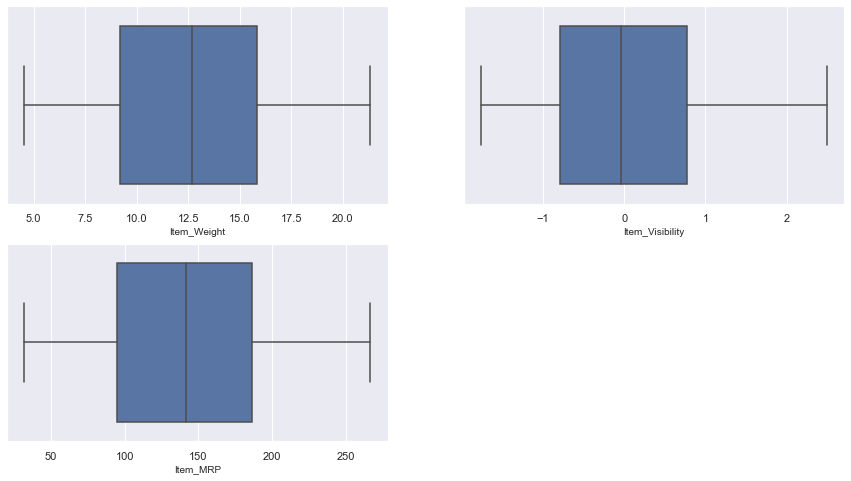

In [50]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_test_numeric2:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.boxplot(df_test_numeric2[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

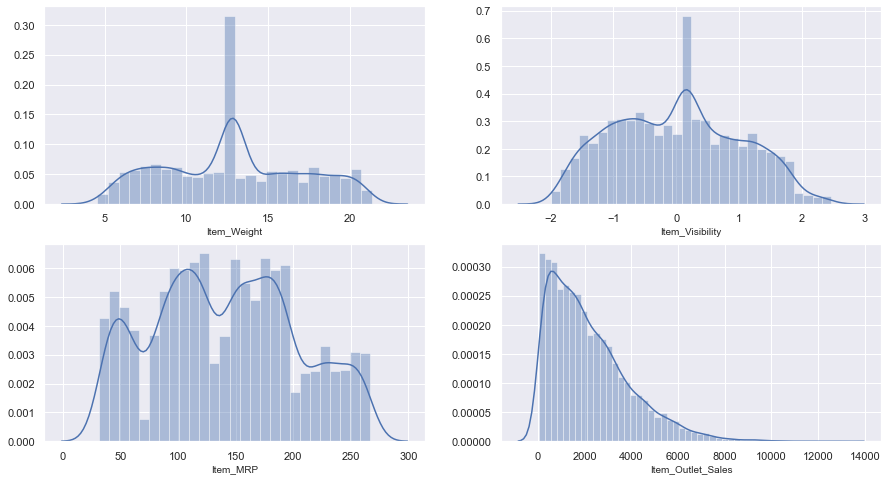

In [51]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_train_numeric1:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.distplot(df_train_numeric1[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

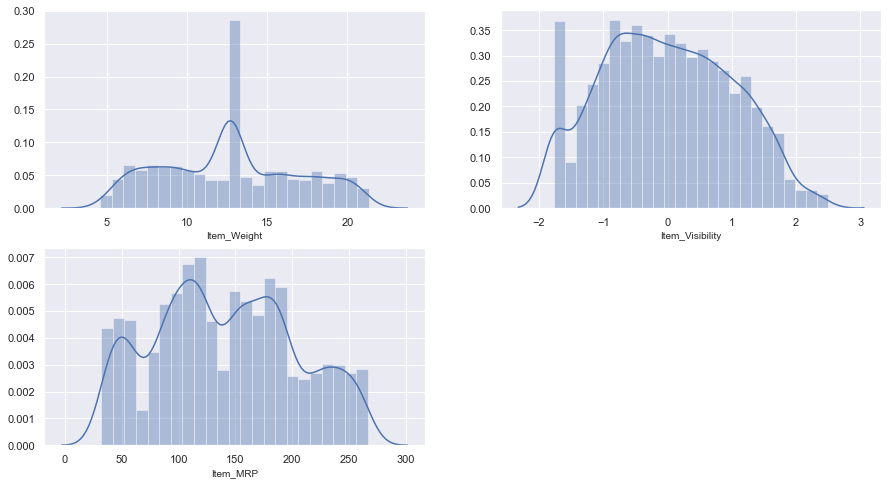

In [52]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_test_numeric2:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.distplot(df_test_numeric2[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

In [53]:
df_train_numeric3 = df_train.select_dtypes(include=['int','float'])
df_train_numeric3.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

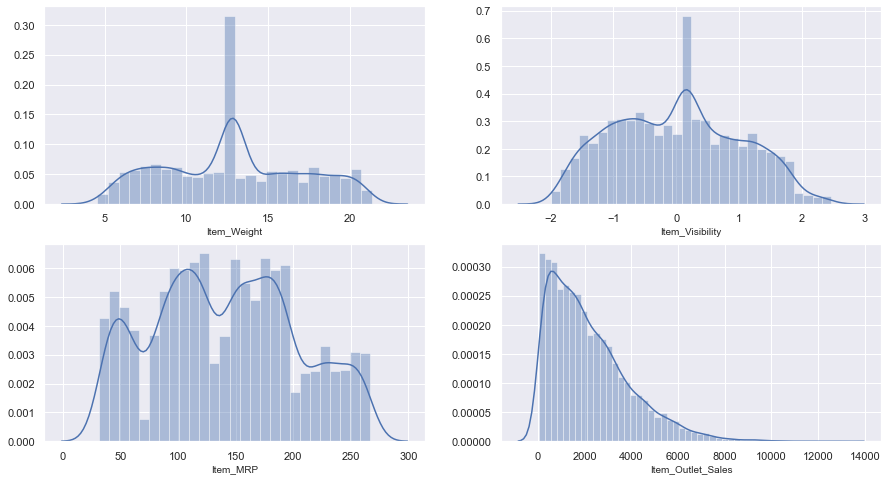

In [54]:
plt.figure(figsize=(15,8))
pltnumber = 1
for i in df_train_numeric3:
    if pltnumber<=4:
        plt.subplot(2,2,pltnumber)
        sns.distplot(df_train_numeric3[i])
        plt.xlabel(i,fontsize=10)
        pltnumber+=1
plt.show()

## Label Encoding

In [55]:
df_train = pd.get_dummies(data=df_train,columns=['Item_Fat_Content','Item_Type','Outlet_Type','Outlet_Location_Type'],drop_first=True)

In [56]:
df_test = pd.get_dummies(data=df_test,columns=['Item_Fat_Content','Item_Type','Outlet_Type','Outlet_Location_Type'],drop_first=True)

In [57]:
df_train = df_train.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,-1.449414,249.8092,3735.1380,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.92,-1.319061,48.2692,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,17.50,-1.420268,141.6180,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,19.20,0.147136,182.0950,732.3800,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8.93,0.147136,53.8614,994.7052,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [58]:
df_test = df_test.drop(columns=['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
df_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,20.750000,-1.462069,107.8622,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,8.300000,-0.448019,87.3198,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,14.600000,0.871342,241.7538,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,7.315000,-1.175927,155.0340,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,12.695633,1.153823,234.2300,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
scaler = StandardScaler()

In [61]:
train_col_sacle = df_train[['Item_Weight','Item_MRP']]
test_col_sacle = df_test[['Item_Weight','Item_MRP']]

In [62]:
train_scaler_col = scaler.fit_transform(train_col_sacle)

In [63]:
test_scaler_col = scaler.fit_transform(test_col_sacle)

In [64]:
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)

In [65]:
test_scaler_col = pd.DataFrame(test_scaler_col,columns=test_col_sacle.columns)

In [66]:
df_train['Item_Weight']= train_scaler_col['Item_Weight']
#df_train['Item_Visibility']= train_scaler_col['Item_Visibility']
df_train['Item_MRP']= train_scaler_col['Item_MRP']

In [67]:
df_test['Item_Weight']= test_scaler_col['Item_Weight']
#df_test['Item_Visibility']= test_scaler_col['Item_Visibility']
df_test['Item_MRP']= test_scaler_col['Item_MRP']

In [68]:
X = df_train.drop(columns=['Item_Outlet_Sales'])
y = df_train['Item_Outlet_Sales']

In [69]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.20, random_state=11)

## Model Building

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [71]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
print("Model is created")

Model is created


In [72]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [73]:
print("le_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))
print("svm_score",svm.score(X_train,y_train))

le_score 0.5651238300455228
knn_score 0.6453383346530155
dt_score 1.0
rf_score 0.9341817974507096
adb_score 0.45344712876245863
svm_score 0.07059397797278089


In [74]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [76]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))

lr_score 1323373.221221747
knn_score 1515632.8013907268
dt_score 2270878.244610429
rf_score 1341014.2975664847
adb_score 1752915.586140737
svm_score 2693373.4609105056


In [77]:
from sklearn.model_selection import KFold,cross_val_score

In [78]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [79]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))
print("Cross validation score for svm model","=>",cross_val_score(svm,X,y,cv=5))

Cross validation score for lr model => [0.56985802 0.55005995 0.54615638 0.56310581 0.56207429]
Cross validation score for knn model => [0.49607121 0.43891302 0.448249   0.45226039 0.50396711]
Cross validation score for dt model => [0.24178083 0.17137665 0.11635134 0.19555415 0.18183024]
Cross validation score for rf model => [0.55821789 0.50546402 0.50205586 0.53165324 0.55803036]
Cross validation score for adb model => [0.44398768 0.3346826  0.38403101 0.36812915 0.40217499]
Cross validation score for svm model => [0.05696218 0.08089833 0.0584967  0.06667828 0.0669392 ]


In [80]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,X,y,cv=5).mean())

Cross validation score for lr model => 0.5582508907804258
Cross validation score for knn model => 0.46789214816407404
Cross validation score for dt model => 0.18288686417115146
Cross validation score for rf model => 0.5275219943455108
Cross validation score for adb model => 0.4112336680421779
Cross validation score for svm model => 0.065994937003735


# HyperParameter tuning :

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [83]:
parm_grid = {'criterion':['mse','mae'],'splitter':['best'],
             'max_depth':[3,4,5,6],'min_samples_split':[2,5,6],
             'min_samples_leaf':[1,2,3,4,5,],'max_features':['auto','sqrt']}
parm_grid

{'criterion': ['mse', 'mae'],
 'splitter': ['best'],
 'max_depth': [3, 4, 5, 6],
 'min_samples_split': [2, 5, 6],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt']}

In [84]:
gridsearch = GridSearchCV(dt, param_grid = parm_grid , cv=3 , verbose = 2 ,n_jobs =4)

In [85]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 6], 'splitter': ['best']},
             verbose=2)

In [86]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [87]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=5,max_features='auto',min_samples_leaf=1,min_samples_split=2,splitter='best')

In [88]:
dt1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto')

In [89]:
dt1.score(X_train, y_train)

0.6124252646968187

with the hyperparameter tuning we are not getting the acceptable score.so we are saving the model without using it.

## Model saving

In [90]:
import pickle

In [91]:
filename = 'bigmart_model.pickle'

In [92]:
pickle.dump(dt,open(filename,'wb'))

#### Predicting test data using saved model

In [93]:
loaded_model = pickle.load(open(filename, 'rb'))

In [94]:
loaded_model.predict(df_test)

array([2299.6732, 1831.6158,  246.346 , ..., 2330.3   , 5426.27  ,
       1997.4   ])

### Thank you !